In [1]:
#PHY 80 W23
#Lab 10: Statistics of Radioactive Decay (09/02/23)
#Lab Partners: Ravi Kini, Sam Wu (Individual work of Ravi Kini)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import binom, poisson, norm

See the handwritten logbook for entries.

### 10.1

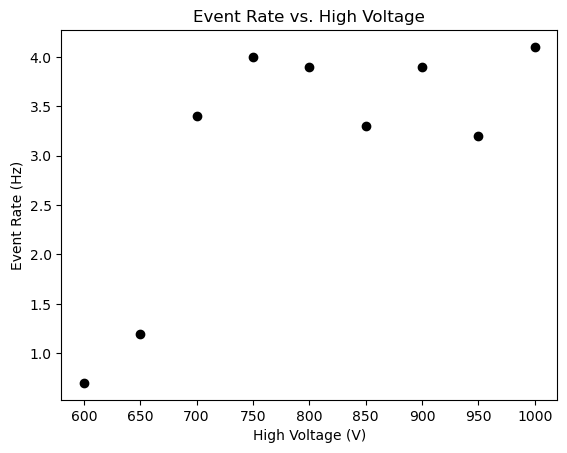

In [2]:
v = np.array([600, 650, 700, 750, 800, 850, 900, 950, 1000]) #high-voltage value
ev = np.array([7, 12, 34, 40, 39, 33, 39, 32, 41]) #events observed in 10 seconds
plt.plot(v, ev/10, "ko")
plt.xlabel("High Voltage (V)")
plt.ylabel("Event Rate (Hz)")
plt.title("Event Rate vs. High Voltage")
plt.show()
#my choice for the Geiger Counter HV Voltage would be 750 volts

### 10.2

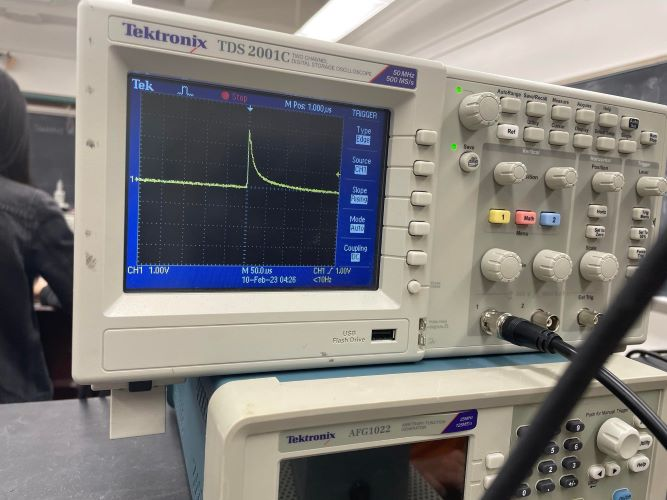

In [3]:
image = Image(filename='../img/phy80_lab10_2.jpg',height = 100)
display(image)
#geiger counter pulse with height of 2.7 volts and duration of 138 microseconds

### 10.3

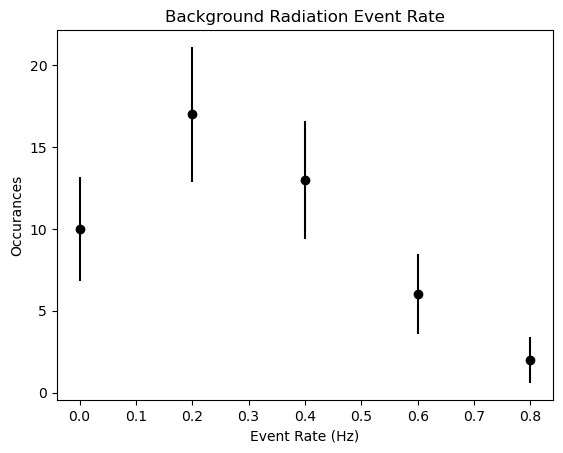

In [4]:
ev_bkg = np.array([1, 2, 2, 0, 0, 0, 3, 2, 2, 4, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 2, 1, 4, 1, 1, 0, 0, 0, 2, 1, 3, 3, 1, 3, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1])
#number of events recorded in 5 second interval (background radiation)
counts, edges = np.histogram(ev_bkg, bins=5, range=(0,5))
plt.errorbar((edges[:-1] + edges[1:] - 1)/2/5, counts, fmt="ko", yerr=counts**0.5)
plt.xlabel("Event Rate (Hz)")
plt.ylabel("Occurances")
plt.title("Background Radiation Event Rate")
plt.show()
#there were only 5 possible values for the data points, so 5 bins were used

### 10.4

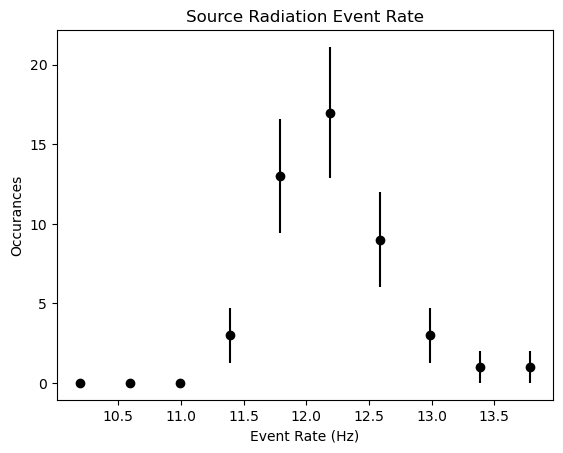

In [5]:
ev_src = np.array([601, 603, 586, 609, 604, 614, 568, 668, 624, 617, 591, 588, 610, 583, 641, 636, 609, 577, 612, 572, 600, 622, 615, 655, 588, 597, 591, 624, 613, 617, 605, 627, 628, 626, 595, 585, 645, 683, 599, 603, 584, 630, 598, 604, 607, 599, 628])
#number of events recorded in 50 second interval (source radiation)
counts, edges = np.histogram(ev_src, bins=10, range=(500,700))
plt.errorbar((edges[:-1] + edges[1:] - 1)/2/50, counts, fmt="ko", yerr=counts**0.5)
plt.xlabel("Event Rate (Hz)")
plt.ylabel("Occurances")
plt.title("Source Radiation Event Rate")
plt.show()
#10 bins showed the shape of the data while not being excessively detailed

### 10.5

In [6]:
print("Background Data:")
print("The event rate mean is {0:.3f} Hz".format(np.mean(ev_bkg/5)))
print("The event rate variation is {0:.3f} Hz^2".format(np.var(ev_bkg/5)))
print("The event rate standard deviation is {0:.3f} Hz".format(np.sqrt(np.var(ev_bkg/5))))

Background Data:
The event rate mean is 0.288 Hz
The event rate variation is 0.047 Hz^2
The event rate standard deviation is 0.216 Hz


### 10.6

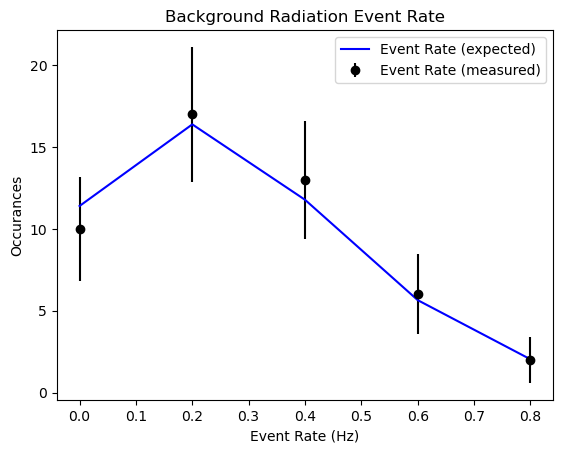

In [7]:
counts, edges = np.histogram(ev_bkg, bins=5, range=(0,5))
plt.errorbar((edges[:-1] + edges[1:] - 1)/2/5, counts, fmt="ko", yerr=counts**0.5, label="Event Rate (measured)")
xpred = (edges[:-1] + edges[1:] - 1)/2
ypred = 48 * poisson.pmf(xpred, np.mean(ev_bkg))
plt.plot(xpred/5, ypred, "b-", label="Event Rate (expected)")
plt.xlabel("Event Rate (Hz)")
plt.ylabel("Occurances")
plt.title("Background Radiation Event Rate")
plt.legend()
plt.show()
#the collected background data matches a poisson distribution fairly well

### 10.7

In [8]:
print("Source Data:")
print("The event rate mean is {0:.3f} Hz".format(np.mean(ev_src/50)))
print("The event rate variation is {0:.3f} Hz^2".format(np.var(ev_src/50)))
print("The event rate standard deviation is {0:.3f} Hz".format(np.sqrt(np.var(ev_src/50))))

Source Data:
The event rate mean is 12.205 Hz
The event rate variation is 0.218 Hz^2
The event rate standard deviation is 0.467 Hz


### 10.8

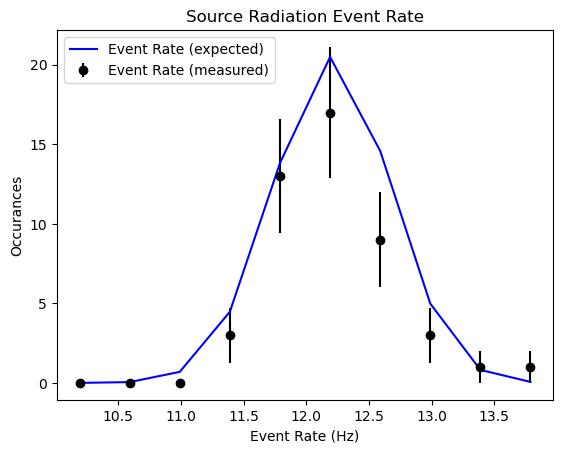

In [9]:
counts, edges = np.histogram(ev_src, bins=10, range=(500,700))
plt.errorbar((edges[:-1] + edges[1:] - 1)/2/50, counts, fmt="ko", yerr=counts**0.5, label="Event Rate (measured)")
xpred = (edges[:-1] + edges[1:] - 1)/2/50
ypred = 24 * norm.pdf(xpred, loc=np.mean(ev_src/50), scale=np.sqrt(np.var(ev_src/50)))
plt.plot(xpred, ypred, "b-", label="Event Rate (expected)")
plt.xlabel("Event Rate (Hz)")
plt.ylabel("Occurances")
plt.title("Source Radiation Event Rate")
plt.legend()
plt.show()
#the collected source data matches a gaussian distribution fairly well

### 10.9

In [10]:
#I think the background radiation originates from cosmic rays, as the annihilation of positrons releases gamma rays.
#There may also be radon in the building.

### 10.10

In [11]:
#There will likely be less background radiation, as my house is fairly new and radon-resistant, while I cannot say the same about Roessler Hall.

### 10.11

In [12]:
#Cs-137 decays into Ba-137m and Ba-137.
#As it decays to Ba-137m (and then to Ba-137) in 95% of instances of beta decay, it is most likely responsible for the counts.